# Bayesian optimizer test and demo notebook

In [3]:
from bayesian_optimizer import BayesianOptimizer
from random import uniform
from numpy import array, arange
import matplotlib.pyplot as plt
%matplotlib inline 

### I. Demo optimization of a 4D Rosenbrock function (this is hard for BO)

In [2]:
def Rosen(x):
    """The Rosenbrock function"""
    return -1.0*sum(100.0*(x[1:]-x[:-1]**2.0)**2.0 + (1-x[:-1])**2.0)

**Generate a random sampling of the function to be optimized**

In [13]:
ranges = [(0.0,2.0), (0.0,2.0), (0.0,2.0), (0.0,2.0)]
bayesian_optimizer = BayesianOptimizer()
bayesian_optimizer.SetRanges(ranges)

In [14]:
features = bayesian_optimizer.SuggestInitialSamples(num_samples=20)
fitness = [Rosen(array(feature)) for feature in features]

In [15]:
print fitness

[-13.360161249685058, -213.83736457545979, -578.44746818709177, -335.64609452617373, -750.92397227173876, -230.20581596928352, -447.76744550358637, -837.6930369463654, -912.19267151860004, -104.38112181966183, -430.40156973720491, -109.39268920037318, -105.94339947557086, -1065.4725088684531, -909.51739051188872, -204.98322039871991, -625.93794162298525, -277.12773384104929, -755.66292264728827, -830.94732586007058]


**Initialize the optimizer and regressor using the "expected improvement"**

In [21]:
bayesian_optimizer.InitalizeRegressor()
bayesian_optimizer.InitializeSuggestionEngine(num_suggestions=4, method='ei')
bayesian_optimizer.InitializeOptimizer(rand_starts=100, tol=1e-5)
bayesian_optimizer.InitialSamples(features, fitness)

**Basic loop to iteratively optimize**

In [22]:
xs = []
ys = []
for i in range(30):
    if i % 10 == 0:
        print 'iteration %i' % i
    suggestions = bayesian_optimizer.Suggest()
    xs_batch = []
    ys_batch = []
    for suggestion in suggestions:
        xs_batch.append(suggestion)
        ys_batch.append(Rosen(array(suggestion)))
    xs.append(xs_batch)
    ys.append(ys_batch)
    bayesian_optimizer.AddSamples(xs_batch, ys_batch)

iteration 0
iteration 10
iteration 20


In [25]:
ys[-1]

[-0.19787949110847625,
 -5.4794868210682743,
 -0.79385496909614484,
 -2.1426594738464853]

**Initialize the optimizer and regressor using the "knowledge gradient"**

In [26]:
bayesian_optimizer.InitalizeRegressor()
bayesian_optimizer.InitializeSuggestionEngine(num_suggestions=4, method='kg', rand_starts__max_pred_fitness=200)
bayesian_optimizer.InitializeOptimizer(rand_starts=100, tol=1e-5)
bayesian_optimizer.InitialSamples(features, fitness)

In [27]:
xs = []
ys = []
for i in range(30):
    if i % 10 == 0:
        print 'iteration %i' % i
    suggestions = bayesian_optimizer.Suggest()
    xs_batch = []
    ys_batch = []
    for suggestion in suggestions:
        xs_batch.append(suggestion)
        ys_batch.append(Rosen(array(suggestion)))
    xs.append(xs_batch)
    ys.append(ys_batch)
    bayesian_optimizer.AddSamples(xs_batch, ys_batch)

iteration 0
iteration 10
iteration 20


In [32]:
zip(*ys)[0]

(-56.731452710842319,
 -828.07768177720232,
 -28.939273643911768,
 -16.430840591100377,
 -27.366453914247302,
 -18.477552981257645,
 -14.351942892713666,
 -4.5339706094171266,
 -2.094523013917323,
 -9.9458017092342779,
 -6.3496000803315411,
 -21.289495128235288,
 -3.2330902702110444,
 -4.6188628166716246,
 -1.7793858943268595,
 -5.5680033295557072,
 -19.256656675351046,
 -4.3234393131677722,
 -12.742780496213641,
 -0.91276464860432061,
 -4.6392851979992802,
 -1.1119262373838839,
 -1.0215015131845846,
 -0.86369487056692218,
 -0.66276918038100341,
 -4.5134492966379751,
 -1.2636272121579541,
 -1.9048585763895345,
 -0.53242875396047662,
 -2.1016347131688073)

### II. Demo optimization of a simple 1D polynomial landscape

In [37]:
def Polynomial(x):
    return 1.5 - 2.0*x + 3.3*x**2.0 - 0.1*x**4.0

**Generate a random sampling of the function to be optimized**

In [38]:
ranges = [(-6.0,6.0)]
bayesian_optimizer = BayesianOptimizer()
bayesian_optimizer.SetRanges(ranges)

In [39]:
features = bayesian_optimizer.SuggestInitialSamples(num_samples=3)
fitness = [Polynomial(array(feature))[0] for feature in features]

In [40]:
print fitness

[1.5, 29.100000000000001, 17.100000000000001]


**Initialize the optimizer and regressor using the "expected improvement"**

In [41]:
bayesian_optimizer.InitalizeRegressor()
bayesian_optimizer.InitializeSuggestionEngine(num_suggestions=1, method='ei')
bayesian_optimizer.InitializeOptimizer(rand_starts=100, tol=1e-5)
bayesian_optimizer.InitialSamples(features, fitness)

**Basic loop to iteratively optimize**

In [42]:
Y_pred = []
EI_pred = []
xs = []
ys = []
for i in range(100):
    if i % 10 == 0:
        print 'iteration %i' % i
    suggestions = bayesian_optimizer.Suggest()
    Y_pred.append(array([bayesian_optimizer.gaussian_process_regressor_.predict([[x]], return_std = False)[0] for x in x_points]))
    EI_pred.append(array([bayesian_optimizer.ExpectedImprovement(array([x])) for x in x_points]))
    xs_batch = []
    ys_batch = []
    for suggestion in suggestions:
        xs_batch.append(suggestion)
        ys_batch.append(Polynomial(suggestion[0]))
    xs.append(xs_batch)
    ys.append(ys_batch)
    bayesian_optimizer.AddSamples(xs_batch, ys_batch)

iteration 0
iteration 10
iteration 20
iteration 30
iteration 40
iteration 50
iteration 60
iteration 70
iteration 80
iteration 90


**Check out the optimization results**

In [43]:
x_points = arange(-6, 6, 0.1)
y_points = Polynomial(x_points)

Expected value

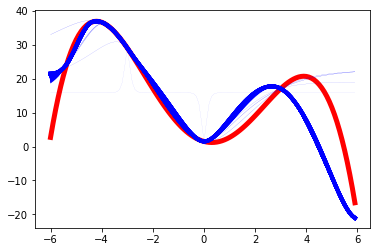

In [52]:
#things to plot
lw = 0.04
plt.plot(x_points, y_points, c="r", linestyle = '-', linewidth = 5, label = "Train")
for y_pred in Y_pred[0:]:
    plt.plot(x_points, y_pred, linestyle = '-', c = 'b', linewidth =lw, label = "Train")
    lw = lw + 0.04

Expected improvement

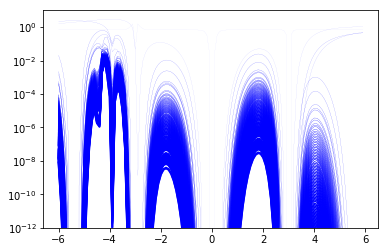

In [45]:
#things to plot
lw = 0.02
#plt.plot(x_points, y_points, c="r", linestyle = '-', linewidth = 5, label = "Train")
for ei_pred in EI_pred[0:]:
    plt.plot(x_points, ei_pred, linestyle = '-', c = 'b', linewidth =lw, label = "Train")
    lw = lw + 0.02
plt.ylim(0.000000000001, 10)
plt.yscale('log')